Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
#import numpy as np
import pandas as pd
from scipy.stats import norm
#from math import factorial
#import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
# filterwarnings('ignore')

# Pandas

## Introduction

<p>*pandas* is a python library that is a monster at data manipulation.  Dare I say: **I love *pandas*!**</p>

## Some basic *pandas*

In [3]:
values_1 = [12.3, 14.2, 15.2, 13.2, 15.4, 11, 12.8, 18.3, 14.3, 15.9, 9.9, 11.9, 17.9]
# Some values in an array

In [4]:
data_1 = pd.Series(values_1) # Taking the values in values_1 and adding them to the computer
# variable data_1

In [5]:
data_1 # Each value is now part of an ordered list, each attached to an index value (starting
# at 0)

0     12.3
1     14.2
2     15.2
3     13.2
4     15.4
5     11.0
6     12.8
7     18.3
8     14.3
9     15.9
10     9.9
11    11.9
12    17.9
dtype: float64

In [6]:
type(values_1) # Whereas values_1 is a computer variable that is a list...

list

In [7]:
type(data_1) # ... is a pandas Series object

pandas.core.series.Series

In [6]:
data_1.describe() # The simplest way to describe a column of values

count    13.000000
mean     14.023077
std       2.516994
min       9.900000
25%      12.300000
50%      14.200000
75%      15.400000
max      18.300000
dtype: float64

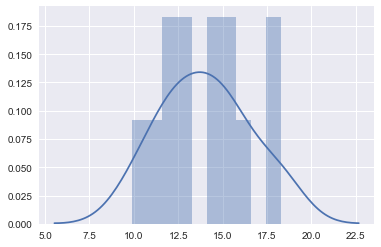

In [10]:
sns.set()
sns.distplot(data_1, bins=10) # A quick histogram and kernel density estimate of the values

In [11]:
values_2 = pd.Series(norm.rvs(loc = 18, scale = 4, size = 13)) # Creating another series, this
# time containing 13 random values from a normal distribution with a mean of 18 and a
# standrad deviation of 4
# I imported the norm function from the scipy.stats library

In [12]:
data_2 = pd.DataFrame() # A new (empty)  pandas DataFrame

In [13]:
data_2['var_1'] = values_1 # Making a new column, calling it var_1 and adding the values in
# values_1 to it

In [14]:
data_2

,var_1
0,12.3
1,14.2
2,15.2
3,13.2
4,15.4
5,11.0
6,12.8
7,18.3
8,14.3
9,15.9


In [15]:
data_2['var_2'] = values_2 # Adding another column to the DataFrame and adding the values in
# values_2 to it

In [16]:
data_2

,var_1,var_2
0,12.3,15.632904
1,14.2,13.044971
2,15.2,22.408613
3,13.2,20.320534
4,15.4,14.849130
5,11.0,18.356973
6,12.8,16.326628
7,18.3,12.741344
8,14.3,23.780795
9,15.9,17.424525


In [17]:
data_2.describe()

,var_1,var_2
count,13.000000,13.000000
mean,14.023077,17.938057
std,2.516994,4.014020
min,9.900000,12.741344
25%,12.300000,14.849130
50%,14.200000,17.424525
75%,15.400000,21.053267
max,18.300000,23.826288


In [21]:
data_3 = data_2[data_2['var_1'] > 15] # Creating a new DataFrame only including rows (for all
# columns) where the values in the var_1 column is greater than 15
data_3

,var_1,var_2
2,15.2,22.408613
4,15.4,14.849130
7,18.3,12.741344
9,15.9,17.424525
12,17.9,23.826288


In [22]:
data_2['groups'] = ['A', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A']
# The data_2 DataFrame now has a new column called groups

In [23]:
data_2

,var_1,var_2,groups
0,12.3,15.632904,A
1,14.2,13.044971,A
2,15.2,22.408613,B
3,13.2,20.320534,A
4,15.4,14.849130,B
5,11.0,18.356973,A
6,12.8,16.326628,B
7,18.3,12.741344,B
8,14.3,23.780795,B
9,15.9,17.424525,A


In [26]:
data_4 = data_2.groupby('groups')
# Creating a new DataFrame by splitting up DataFrame data_2
data_4.head(13)

,var_1,var_2,groups
0,12.3,15.632904,A
1,14.2,13.044971,A
2,15.2,22.408613,B
3,13.2,20.320534,A
4,15.4,14.849130,B
5,11.0,18.356973,A
6,12.8,16.326628,B
7,18.3,12.741344,B
8,14.3,23.780795,B
9,15.9,17.424525,A


In [27]:
data_4.describe() # Now this is magic!

var_1                                                        var_2  \
       count       mean       std   min     25%    50%    75%   max count   
groups                                                                      
A        7.0  13.485714  2.779346   9.9  11.650  13.20  15.05  17.9   7.0   
B        6.0  14.650000  2.249222  11.9  13.175  14.75  15.35  18.3   6.0   

                                                                        \
            mean       std        min        25%        50%        75%   
groups                                                                   
A       18.52278  3.590587  13.044971  16.528715  18.356973  20.686900   
B       17.25588  4.707630  12.741344  13.783861  15.587879  20.888117   

                   
              max  
groups             
A       23.826288  
B       23.780795

## Importing spreadsheet files

In [28]:
data_5 = pd.read_csv('MOOC_Mock.csv') # Creating a computer variable called data_5, attatching
# to it a comma seperated value file, which makes it a DataFrame

In [29]:
type(data_5) # Yes, it's a DataFrame object

pandas.core.frame.DataFrame

In [32]:
data_5.head() # Showing the first few (default is 5) rows

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57.0,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3
3,4,20,Female,2,9,No,Yes,NaN,120,35.7,77.8,4.45,8.8,No,No,No,0
4,5,28,Female,3,3,No,Yes,491.0,115,37.1,51.6,21.98,13.4,No,Yes,No,7


In [33]:
data_5.set_index('File').head(3) # Changing the default index column to the File column

,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
File,,,,,,,,,,,,,,,,
1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
2,32,Male,6,10,No,Yes,57.0,109,38.8,45.3,7.08,19.8,No,No,Yes,8
3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


In [34]:
data_5.tail(3)

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
147,148,54,Male,5,11,Yes,Yes,NaN,115,38.2,NaN,17.64,15.7,Yes,Yes,No,1
148,149,29,Male,4,6,No,Yes,45.0,133,41.2,163.5,15.50,19.2,Yes,Yes,Yes,9
149,150,55,Female,5,2,Yes,Yes,78.0,95,40.6,NaN,24.22,16.5,Yes,Yes,No,4
